In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:

url = "https://www.scrapethissite.com/pages/simple/"

response = requests.get(url)

if response.status_code == 200:
    print("Request successful!")
else:
    print(f"Request failed with status code: {response.status_code}")

Request successful!


In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping
  </title>
  <link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
  <link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
  <meta content="noindex

In [7]:
countries = []

rows = soup.find_all('div', class_='col-md-4 country') 

for row in rows:
    name = row.find('h3', class_='country-name').text.strip()
    capital = row.find('span', class_='country-capital').text.strip()
    population = row.find('span', class_='country-population').text.strip()
    area = row.find('span', class_='country-area').text.strip()

    countries.append({
        'Name': name,
        'Capital': capital,
        'Population': population,
        'Area': area
    })

countries[:5]

[{'Name': 'Andorra',
  'Capital': 'Andorra la Vella',
  'Population': '84000',
  'Area': '468.0'},
 {'Name': 'United Arab Emirates',
  'Capital': 'Abu Dhabi',
  'Population': '4975593',
  'Area': '82880.0'},
 {'Name': 'Afghanistan',
  'Capital': 'Kabul',
  'Population': '29121286',
  'Area': '647500.0'},
 {'Name': 'Antigua and Barbuda',
  'Capital': "St. John's",
  'Population': '86754',
  'Area': '443.0'},
 {'Name': 'Anguilla',
  'Capital': 'The Valley',
  'Population': '13254',
  'Area': '102.0'}]

In [9]:
df = pd.DataFrame(countries)

df.head()

,Name,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


In [11]:
df.to_csv('countries_data.csv', index=False)

print("Data saved to 'countries_data.csv'")

Data saved to 'countries_data.csv'


In [13]:
print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

Duplicate rows: 0


In [15]:
# Normalize text
df['Name'] = df['Name'].str.title() 
df['Capital'] = df['Capital'].str.title()

In [17]:
df.to_csv('cleaned_countries_data.csv', index=False)
print("Cleaned data saved to 'cleaned_countries_data.csv'")

Cleaned data saved to 'cleaned_countries_data.csv'


In [19]:
df.to_excel('cleaned_countries_data.xlsx', index=False)
print("Cleaned data saved to 'cleaned_countries_data.xlsx'")

Cleaned data saved to 'cleaned_countries_data.xlsx'


In [21]:
print(df.describe()) 
print(df['Name'].value_counts()) 

           Name Capital Population  Area
count       250     250        250   250
unique      250     242        247   246
top     Andorra    None          0  21.0
freq          1       8          4     3
Name
Andorra                                         1
Oman                                            1
Mozambique                                      1
Namibia                                         1
New Caledonia                                   1
                                               ..
Greece                                          1
South Georgia And The South Sandwich Islands    1
Guatemala                                       1
Guam                                            1
Zimbabwe                                        1
Name: count, Length: 250, dtype: int64


In [23]:
largest_population = df.sort_values('Population', ascending=False).head(5)
print("Top 5 Most Populated Countries:")
print(largest_population)

largest_area = df.sort_values('Area', ascending=False).head(5)
print("Top 5 Largest Countries by Area:")
print(largest_area)

Top 5 Most Populated Countries:
            Name    Capital Population       Area
176  Philippines     Manila   99900177   300000.0
99       Hungary   Budapest    9982000    93030.0
28       Bolivia      Sucre    9947418  1098580.0
23       Burundi  Bujumbura    9863117    27830.0
196       Sweden  Stockholm    9828655   449964.0
Top 5 Largest Countries by Area:
              Name     Capital  Population       Area
37          Canada      Ottawa    33679000  9984670.0
121    South Korea       Seoul    48422644    98480.0
232  United States  Washington   310232863  9629091.0
47           China     Beijing  1330044000  9596960.0
228       Tanzania      Dodoma    41892895   945087.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

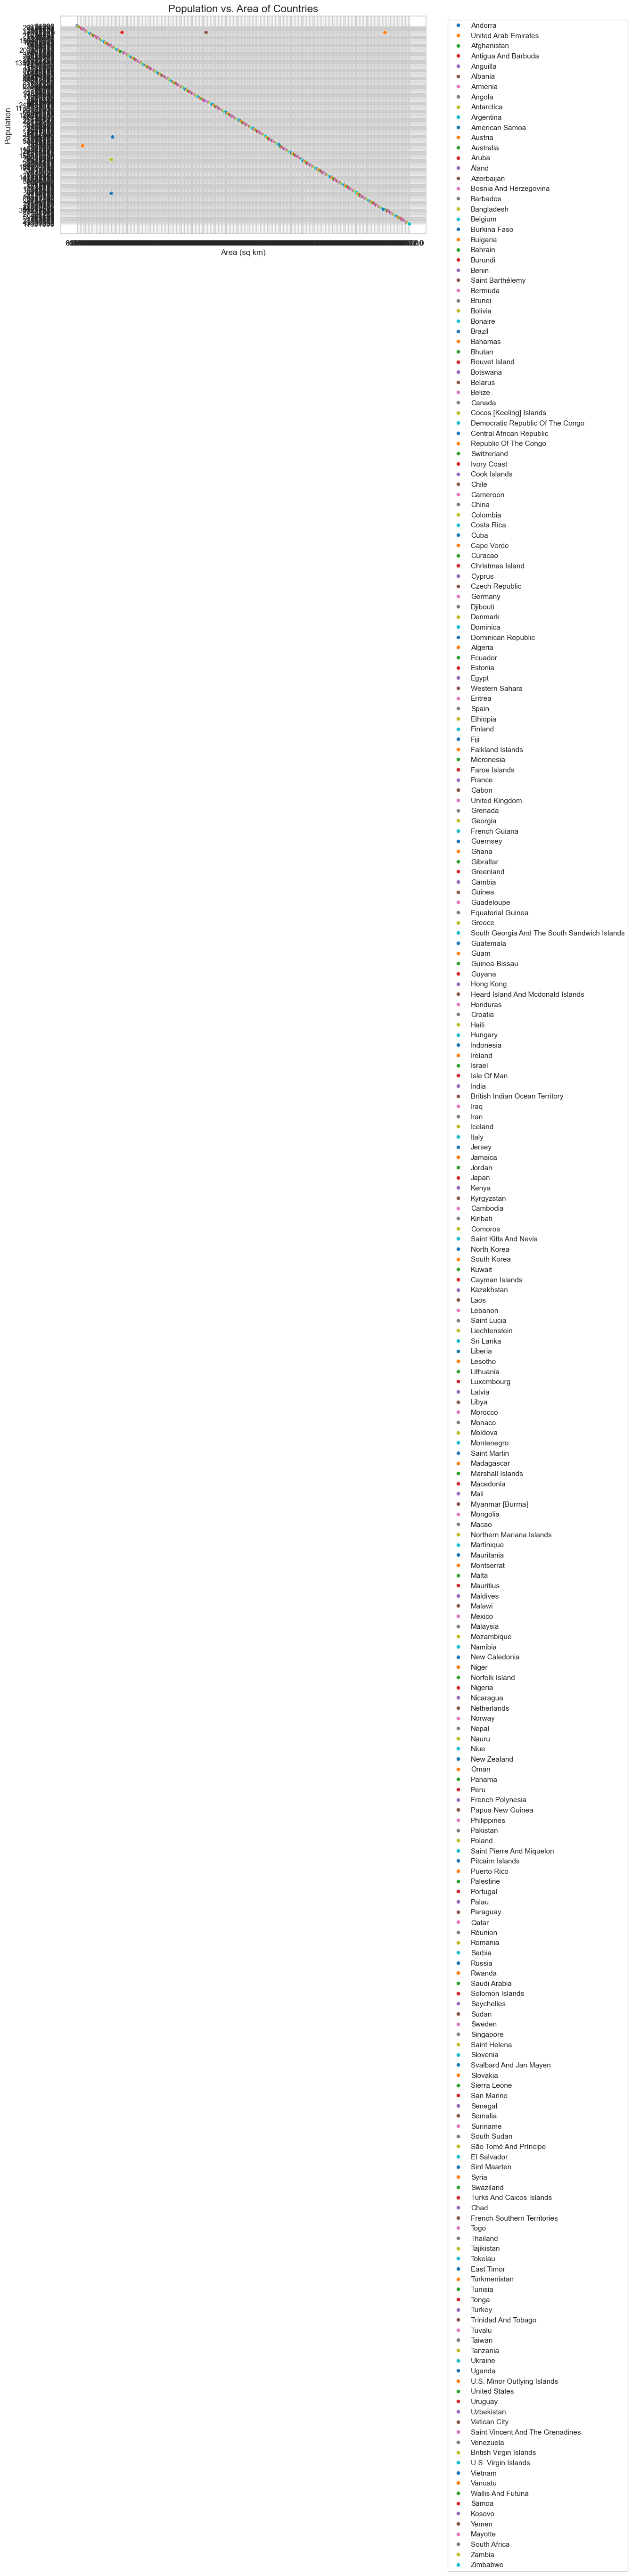

In [27]:
# Scatter plot of Population vs. Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Population', hue='Name', palette='tab10')
plt.title('Population vs. Area of Countries', fontsize=16)
plt.xlabel('Area (sq km)', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

df = df.dropna(subset=['Population'])

In [33]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df.dropna(subset=['Area'])

In [35]:
print(df.dtypes)

Name           object
Capital        object
Population      int64
Area          float64
dtype: object


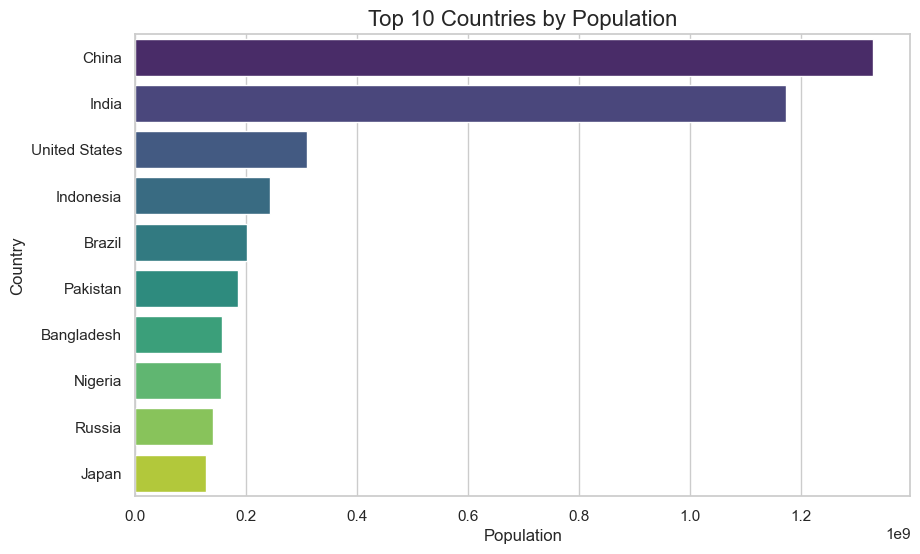

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_population,
    x='Population',
    y='Name',
    palette='viridis',
    hue='Name',  
    dodge=False,  
    legend=False  
)

plt.title('Top 10 Countries by Population', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

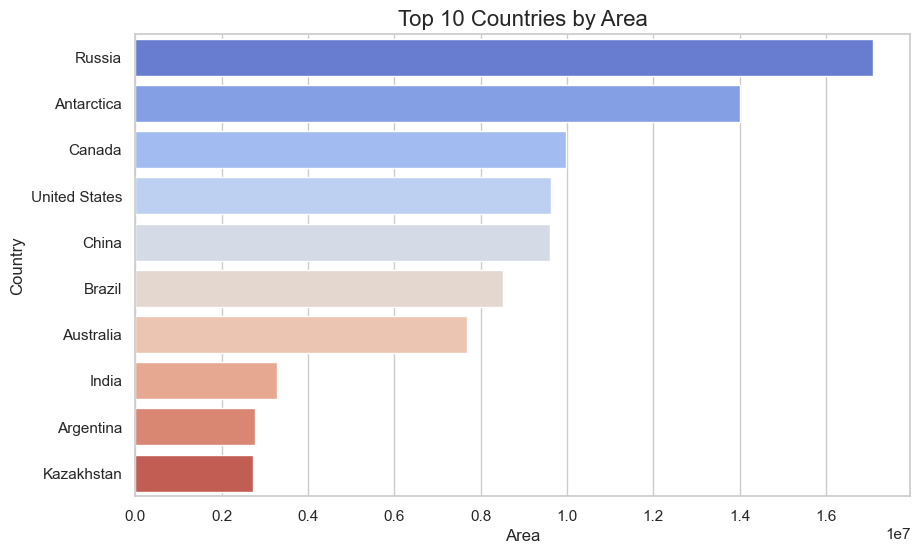

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_area,
    x='Area',
    y='Name',
    palette='coolwarm',
    hue='Name',  
    dodge=False,  
    legend=False  
)

plt.title('Top 10 Countries by Area', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

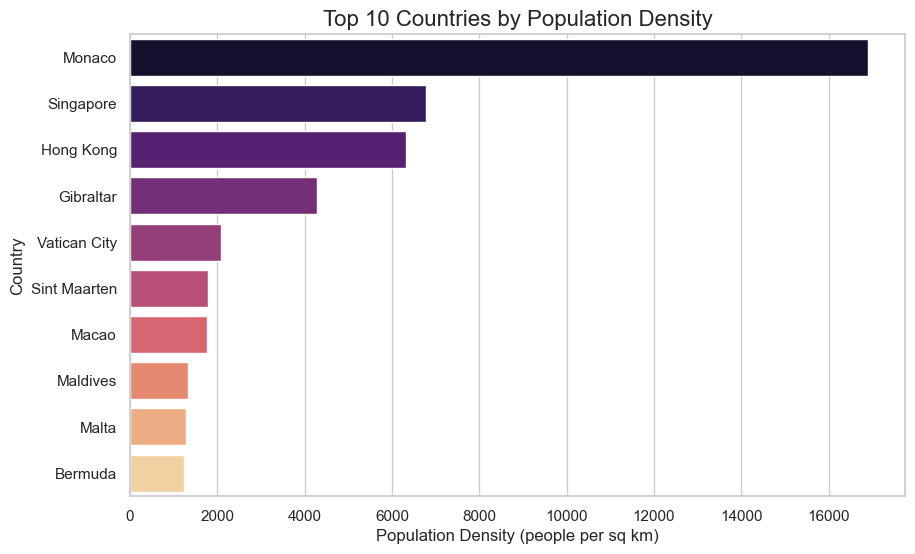

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_density,
    x='Population Density',
    y='Name',
    palette='magma',
    hue='Name',  
    dodge=False,  
    legend=False  
)

plt.title('Top 10 Countries by Population Density', fontsize=16)
plt.xlabel('Population Density (people per sq km)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [53]:
df.to_csv('cleaned_countries_data.csv', index=False)
print("Data saved to 'cleaned_countries_data.csv'")


df.to_excel('cleaned_countries_data.xlsx', index=False)
print("Data saved to 'cleaned_countries_data.xlsx'")

Data saved to 'cleaned_countries_data.csv'
Data saved to 'cleaned_countries_data.xlsx'


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Area']]  
y = df['Population'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.526602671570505e+16
